## Prediksi Goal Scored dengan Parameter Shoot On Target Pada **[Dataset Fifa 2018 Match Statistics](https://www.kaggle.com/mathan/fifa-2018-match-statistics).**

Pada project ini, saya mencoba memprediksi **Goal Scored** dengan parameter **On-Target** menggunakan **Linear Regression**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FIFA 2018 Statistic.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [3]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

#### Mengetahui Jumlah Baris dan Kolom

In [4]:
df.shape

(128, 27)

#### Memperoleh Deskripsi Singkat Dari Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

#### Mengetahui Summary Statistik

In [6]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


#### Periksa data NaN

In [7]:
df.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

Ada beberapa kolom yang berisi NaN.
Setelah kita memperhatikan dataset tersebut, kolom yang memiliki data NaN tidak berpengaruh terhadap kolom On_Target dan Goal Scored. Kita bisa mengabaikan, memberi nilai kosong, atau menghapus kolom.

Disini saya akan menghapus kolom yang berisi nilai NaN

In [8]:
df = df.drop(columns=['1st Goal','Own goals','Own goal Time'])

In [9]:
df.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
Round                     0
PSO                       0
Goals in PSO              0
dtype: int64

#### Mengetahui Korelasi Fitur

In [23]:
df_cor = df.corr().abs()
df_cor

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
Goal Scored,1.000000,0.034759,0.144915,0.461702,0.020374,0.087072,0.040446,0.045105,0.046815,0.118893,0.135688,0.043971,0.014355,0.030331,0.048838,0.035031,0.089714,0.011204
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,0.293658,0.713872,0.880611,0.059054,0.296477,0.205511,0.090924,0.024316,0.010086
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,0.016508,0.140850,0.268217,0.397614,0.582831,0.171381,0.248773,0.185544,0.074594,0.009795,0.149836
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,0.321557,0.291659,0.348099,0.065475,0.192242,0.115259,0.051742,0.023439,0.040322
Off-Target,0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,0.095919,0.142367,0.126644,0.189760,0.398949,0.229930,0.186858,0.124094,0.145577,0.119332,0.185807
Blocked,0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,0.002231,0.086021,0.142960,0.401699,0.532913,0.082111,0.174606,0.163111,0.033717,0.165295,0.108220
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,0.034054,0.085216,0.233787,0.330363,0.524661,0.099700,0.165382,0.169929,0.014543,0.117960,0.088997
Offsides,0.045105,0.057706,0.016508,0.073176,0.095919,0.002231,0.034054,1.000000,0.089121,0.006539,0.127421,0.034715,0.031324,0.040084,0.047757,0.228531,0.036432,0.064892
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,0.231637,0.131951,0.175695,0.076927,0.080341,0.026741,0.029701,0.104164,0.138046
Saves,0.118893,0.293658,0.268217,0.321557,0.126644,0.142960,0.233787,0.006539,0.231637,1.000000,0.190740,0.264425,0.125645,0.074976,0.009670,0.140307,0.016875,0.110014


Dapat kita ketahui bahwa fitur **On-Target** memiliki korelasi yang paling kuat terhadap **Goal-Scored**

In [26]:
X = df.loc[:, ['On-Target']]
y = df.loc[:, ['Goal Scored']]

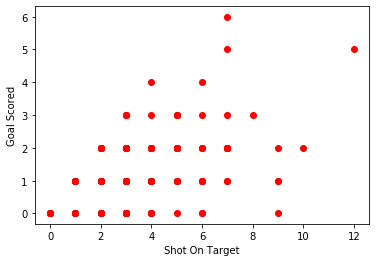

In [27]:
plt.scatter(X,y,color='red')
plt.xlabel('Shot On Target')
plt.ylabel('Goal Scored')
plt.show()

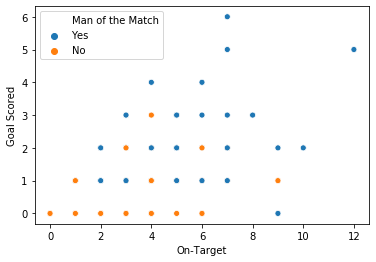

In [12]:
import seaborn as sns
sns.scatterplot(x=df['On-Target'], y=df['Goal Scored'], hue=df['Man of the Match'])
plt.show()

## Prediksi dengan Linear Regression
### Melatih Model

###### 1. Training

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=1/3)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### 2. Predict

In [17]:
y_pred = regressor.predict(X_test)
print('Model Score Linear Regression :', regressor.score(X_test, y_test))

Model Score Linear Regression : 0.28701347896125184


In [18]:
df1 = pd.DataFrame(y_test).reset_index(drop = True)
df2 = pd.DataFrame(y_pred, columns=['Perdicted Goal Scored']).reset_index(drop=True)

print(df1.join(df2.astype(int)).head(10))

   Goal Scored  Perdicted Goal Scored
0            1                      1
1            3                      1
2            2                      1
3            2                      1
4            2                      1
5            1                      1
6            2                      1
7            4                      1
8            0                      1
9            3                      1


#### Visulalisasi Hasil Prediksi dengan Model Linear Regression

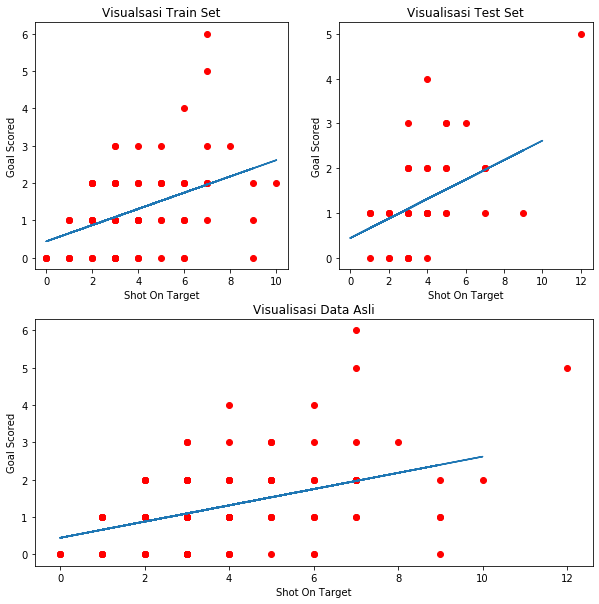

In [19]:
plt.figure(figsize=(10,10))

plot1 = plt.subplot(221)
plot1 = plt.scatter(X_train, y_train, color='r')
plot1 = plt.plot(X_train, regressor.predict(X_train))
plot1 = plt.title('Visualsasi Train Set')
plot1 = plt.xlabel('Shot On Target')
plot1 = plt.ylabel('Goal Scored')

plot2 = plt.subplot(222)
plot2 = plt.scatter(X_test, y_test, color='r')
plot2 = plt.plot(X_train, regressor.predict(X_train))
plot2 = plt.title('Visualisasi Test Set')
plot2 = plt.xlabel('Shot On Target')
plot2 = plt.ylabel('Goal Scored')

plot3 = plt.subplot(212)
plot3 = plt.scatter(X,y,color='r')
plot3 = plt.plot(X_train, regressor.predict(X_train))
plot3 = plt.title('Visualisasi Data Asli')
plot3 = plt.xlabel('Shot On Target')
plot3 = plt.ylabel('Goal Scored')

plt.show()

#### Prediksi Goal Scored dengan 10 Shot On Target

In [20]:
y_pred = regressor.predict([[10]])
print(f'Hasil Prediksi Goal Scored = {float(y_pred):,.1f}')
print(f'Hasil Prediksi Goal Scored Jika Nilai diBulatkan dengan Round = {float(y_pred.round())}')
print(f'Hasil Prediksi Goal Scored Jika Menghilangkan Nilai Dibelakang Koma = {int(y_pred)}')

Hasil Prediksi Goal Scored = 2.6
Hasil Prediksi Goal Scored Jika Nilai diBulatkan dengan Round = 3.0
Hasil Prediksi Goal Scored Jika Menghilangkan Nilai Dibelakang Koma = 2


#### Visualisasi Prediksi Goal Scored dengan 10 Shot On Target

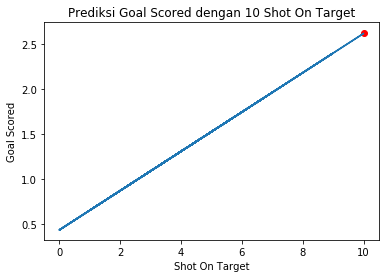

In [21]:
plt.scatter(10, y_pred, color='r')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Prediksi Goal Scored dengan 10 Shot On Target')
plt.xlabel('Shot On Target')
plt.ylabel('Goal Scored')
plt.show()

## Kesimpulan
Untuk memprediksi **Goal-Scored** menggunakan parameter **On-Target** saja tidak mendapatkan hasil prediksi yang akurat, meskipun fitur **On-Target** memiliki korelasi paling tingggi terhadap **Goal-Scored**.

Project ini menggunakan hanya 1 Paramater yaitu **On-Target**, dengan menambah Paramater dan mencoba model machine learning lainnya akan menghasilkan **Prediksi/Model Score** yang lebih baik.

#### Terimakasih!